In [312]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.insert(0, parent_dir)

from bsmodel import BSModel
import numpy as np
import matplotlib.pyplot as plt
import bridgestan as bs
from scipy.stats import norm
from ipywidgets import interact, FloatSlider
import matplotlib as mpl

In [313]:
homedir =  "/mnt/c/Users/jccer/" # "/Users/edward/"

In [314]:
bs.set_bridgestan_path(homedir + "bridgestan")

In [315]:
bs_model = BSModel(stan_file = homedir + "mcmcexperiments/stan/funnel.stan",
                   data_file = homedir + "mcmcexperiments/stan/funnel.json")

In [316]:
x = np.linspace(-20, 20, 301)
y = np.linspace(-20, 20, 301)

In [317]:
z = np.zeros(2)
Z = np.zeros((301, 301))
for ix, xn in enumerate(x):
    for iy, yn in enumerate(y):
        z[0] = xn
        z[1] = yn
        Z[ix, iy] = bs_model.log_density(z)

In [318]:
pt = (2.5, 2.5)

def random_direction(rng):
    x = pt
    return x / np.linalg.norm(x)

def to_line(rho, x, o):
    return x.reshape(-1) * rho + o

In [319]:
rng = np.random.default_rng()

In [320]:
cols = list(mpl.colors.BASE_COLORS.keys())
rho = random_direction(rng)
def rotation_matrix(theta):
    s = np.sin(theta)
    c = np.cos(theta)
    return np.array([[c, -s], [s, c]])
r = rotation_matrix(30)

(-10.0, 10.0)

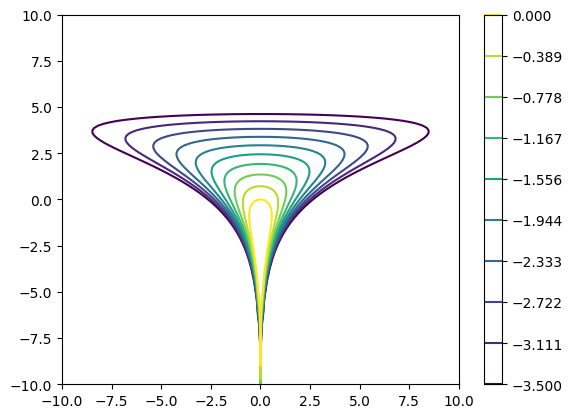

In [321]:
plt.contour(x, y, Z, levels = np.linspace(-3.5, 0, 10))
plt.colorbar()
plt.ylim([-10, 10])
plt.xlim([-10, 10])

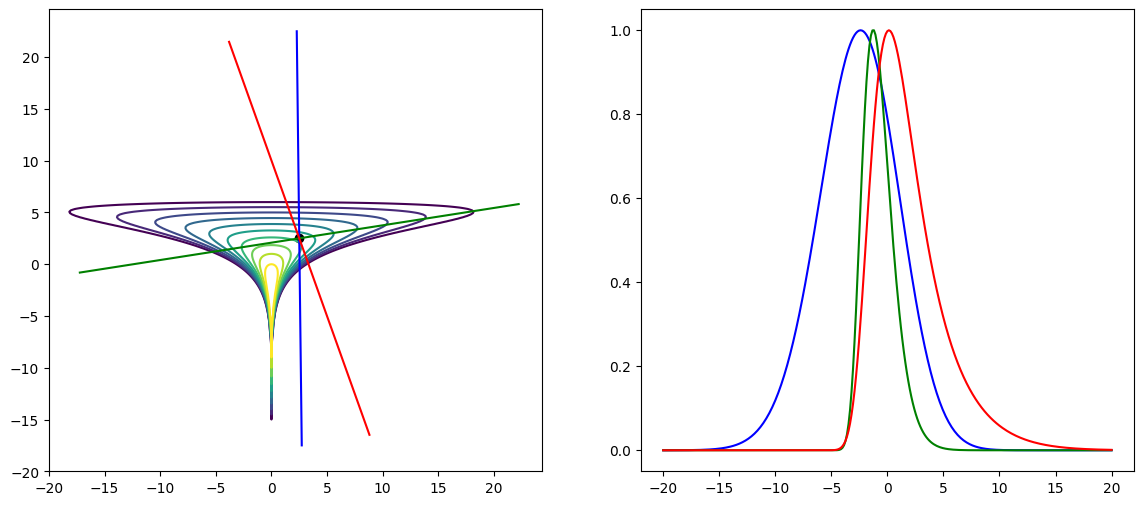

In [347]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))
axs[0].contour(x, y, Z, levels = np.linspace(-5, 0, 10))
axs[0].scatter(pt[0], pt[1], color = "black")
for idx in range(3): 
    line = np.array([to_line(rho, x[n], pt) for n in range(301)])
    fx = np.array([np.exp(bs_model.log_density(line[n])) for n in range(301)])
    mfx = np.max(fx)
    fx = fx / mfx
    axs[0].plot(line[:, 0], line[:, 1], color = cols[idx])
    axs[1].plot(x, fx, color = cols[idx])
    rho = r @ rho